## **Load Dataset**

In [1]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import splitfolders

In [5]:
splitfolders.ratio(input="/content/drive/MyDrive/flowers",output="/content/drive/MyDrive/flowers",seed=1337,ratio=(0.8,0.1,0.1),)

Copying files: 4325 files [01:40, 43.15 files/s] 


## **Image Augmentation**


In [6]:
import keras
from keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
 x_train = train_datagen.flow_from_directory ('/content/drive/MyDrive/flowers/train', target_size = (64,64), batch_size = 100, class_mode= 'categorical')
 x_test = test_datagen.flow_from_directory('/content/drive/MyDrive/flowers/test', target_size = (64,64), batch_size = 100, class_mode= 'categorical')

Found 3458 images belonging to 5 classes.
Found 436 images belonging to 5 classes.


## **Create Model**

In [10]:
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [11]:
model=Sequential()

## **Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden Layers),Output)**

In [12]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) # Convolution layer
model.add(MaxPooling2D(pool_size=(2,2))) # Max pooling layer
model.add(Flatten()) # Flatten layer
# Fully connected layers (ANN)
model.add(Dense(300,activation='relu')) # Hidden layer 1
model.add(Dense(112,activation='relu')) # Hidden layer 2
model.add(Dense(5,activation='softmax')) # Output layer

## **Compile The Model**

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 300)               9225900   
                                                                 
 dense_1 (Dense)             (None, 112)               33712     
                                                                 
 dense_2 (Dense)             (None, 5)                 565       
                                                        

## **Fit The Model**

In [17]:
model.fit_generator(x_train,
                    steps_per_epoch=len(x_train),
                    epochs=100,
                    validation_data=x_test,
                    validation_steps=len(x_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/100
35/35 [==============================] - 29s 813ms/step - loss: 1.7859 - accuracy: 0.3600 - val_loss: 1.2995 - val_accuracy: 0.4427
Epoch 2/100
35/35 [==============================] - 28s 798ms/step - loss: 1.1607 - accuracy: 0.5017 - val_loss: 1.1873 - val_accuracy: 0.4839
Epoch 3/100
35/35 [==============================] - 28s 795ms/step - loss: 1.1029 - accuracy: 0.5411 - val_loss: 1.1474 - val_accuracy: 0.5252
Epoch 4/100
35/35 [==============================] - 28s 801ms/step - loss: 1.0158 - accuracy: 0.5894 - val_loss: 1.0693 - val_accuracy: 0.5505
Epoch 5/100
35/35 [==============================] - 28s 795ms/step - loss: 0.9699 - accuracy: 0.6099 - val_loss: 1.0710 - val_accuracy: 0.5459
Epoch 6/100
35/35 [==============================] - 28s 794ms/step - loss: 0.9174 - accuracy: 0.6475 - val_loss: 1.0806 - val_accuracy: 0.5573
Epoch 7/100
35/35 [==============================] - 28s 802ms/step - loss: 0.8853 - accuracy: 0.6593 - val_loss: 0.9883 - val_accuracy:

##**Save The Model**

In [18]:
model.save('/content/drive/MyDrive/flowers.h5')



##**Test The Model**

In [19]:
import numpy as np
from keras.preprocessing import image

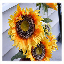

In [20]:
img=image.load_img('/content/drive/MyDrive/flowers/test/sunflower/5004121118_e9393e60d0_n.jpg',target_size=(64,64))
img

In [21]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x

array([[[[251., 251., 253.],
         [252., 255., 255.],
         [252., 255., 255.],
         ...,
         [254., 255., 243.],
         [253., 255., 242.],
         [250., 254., 237.]],

        [[254., 255., 255.],
         [255., 255., 255.],
         [255., 254., 255.],
         ...,
         [253., 254., 255.],
         [252., 255., 255.],
         [252., 255., 251.]],

        [[253., 253., 253.],
         [255., 255., 253.],
         [252., 254., 253.],
         ...,
         [249., 249., 251.],
         [255., 253., 255.],
         [253., 252., 248.]],

        ...,

        [[251., 250., 248.],
         [254., 252., 253.],
         [250., 252., 251.],
         ...,
         [250., 250., 252.],
         [255., 253., 255.],
         [253., 252., 248.]],

        [[252., 251., 249.],
         [255., 255., 253.],
         [255., 255., 255.],
         ...,
         [254., 254., 255.],
         [255., 255., 253.],
         [252., 252., 242.]],

        [[252., 251., 249.],
       

In [22]:
model.predict(x)

array([[0., 0., 0., 1., 0.]], dtype=float32)

In [23]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [24]:
labels=['daisy','dandelion','rose','sunflower','tulip']

In [25]:
print(labels[np.argmax(model.predict(x))])

sunflower
